## Task 8

### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pingouin import qqplot
import warnings

warnings.filterwarnings("ignore")

**Dataset Description**
- The dataset that's we see here contains data about 50 startups. 
- It has 5 columns: “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.
- The first 3 columns indicate how much each startup spends on Research and Development, how much they spend on Marketing, and how much they spend on administration cost, the state column indicates which state the startup is based in, and the last column states the profit made by the startup.

In [2]:
df = pd.read_csv("dataset/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Understanding the dataset

In [3]:
df.shape

(50, 5)

In [4]:
df.size

250

In [5]:
df.memory_usage()

Index              128
R&D Spend          400
Administration     400
Marketing Spend    400
State              400
Profit             400
dtype: int64

In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.State.value_counts(normalize=True)

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64

In [11]:
df.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [12]:
df.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [13]:
df.std()

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

In [14]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [15]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data Visualization

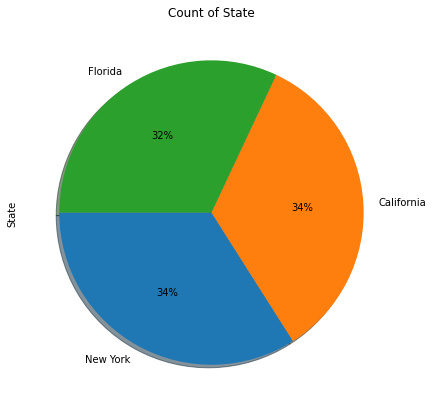

In [16]:
plt.figure(figsize=(7, 7))
df.State.value_counts().plot.pie(
    autopct="%.0f%%", labels=df.State.unique(), shadow=True, startangle=180
)
plt.title("Count of State")
plt.show()

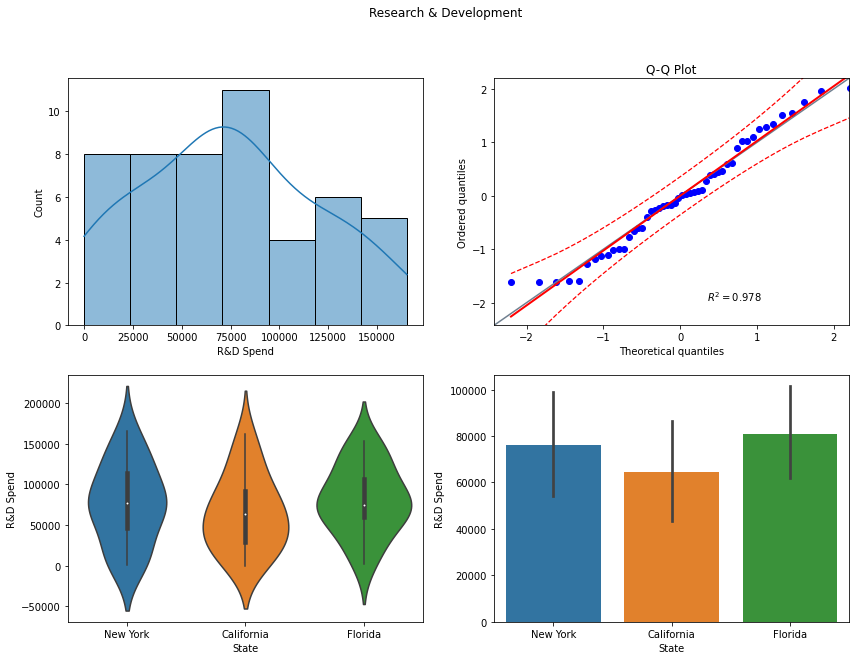

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(x=df["R&D Spend"], ax=axes[0][0], kde=True)
qqplot(df["R&D Spend"], dist="norm", ax=axes[0][1])
sns.violinplot(x=df.State, y=df["R&D Spend"], ax=axes[1][0])
sns.barplot(x=df.State, y=df["R&D Spend"], ax=axes[1][1])
plt.suptitle("Research & Development")
plt.show()

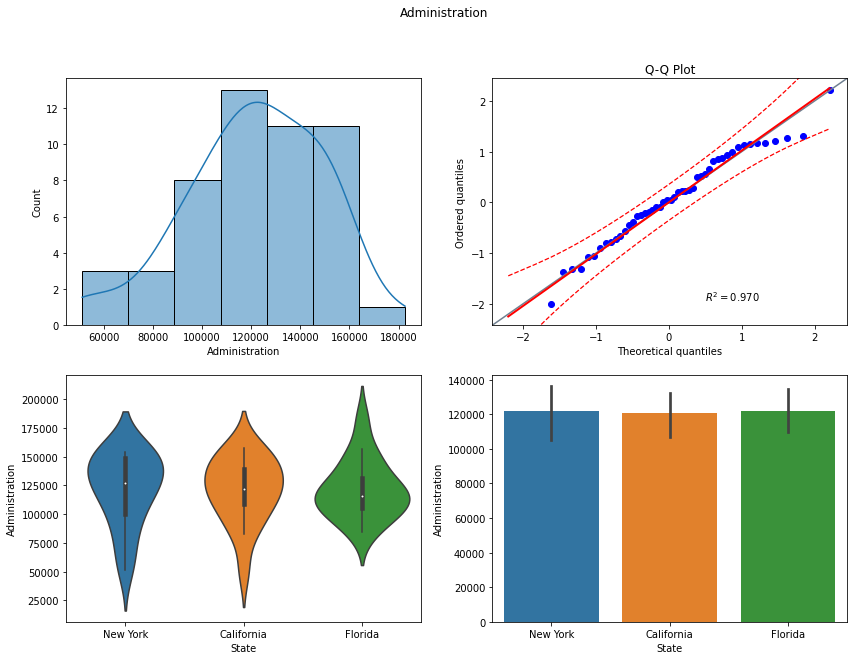

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(x=df["Administration"], ax=axes[0][0], kde=True)
qqplot(df["Administration"], dist="norm", ax=axes[0][1])
sns.violinplot(x=df.State, y=df["Administration"], ax=axes[1][0])
sns.barplot(x=df.State, y=df["Administration"], ax=axes[1][1])
plt.suptitle("Administration")
plt.show()

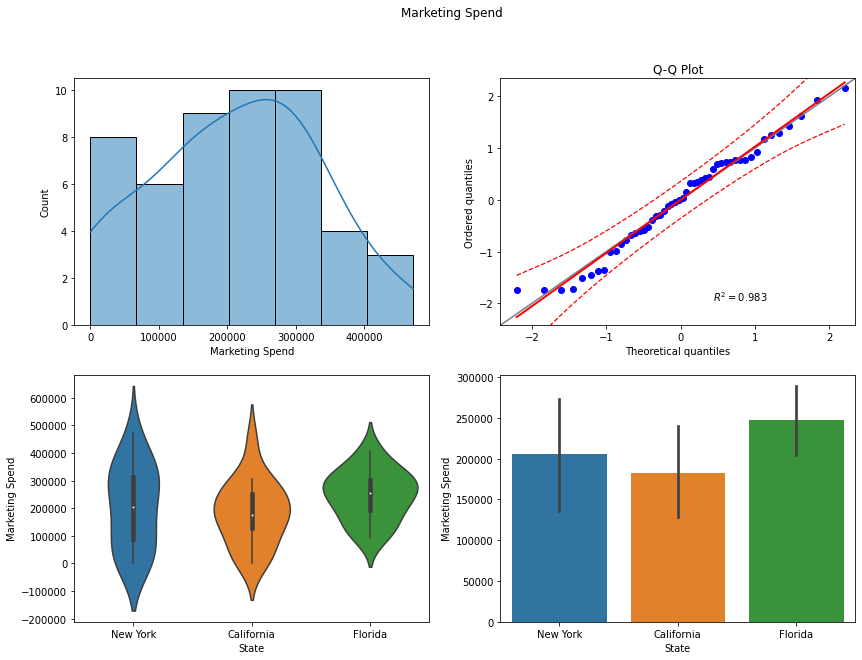

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(x=df["Marketing Spend"], ax=axes[0][0], kde=True)
qqplot(df["Marketing Spend"], dist="norm", ax=axes[0][1])
sns.violinplot(x=df.State, y=df["Marketing Spend"], ax=axes[1][0])
sns.barplot(x=df.State, y=df["Marketing Spend"], ax=axes[1][1])
plt.suptitle("Marketing Spend")
plt.show()

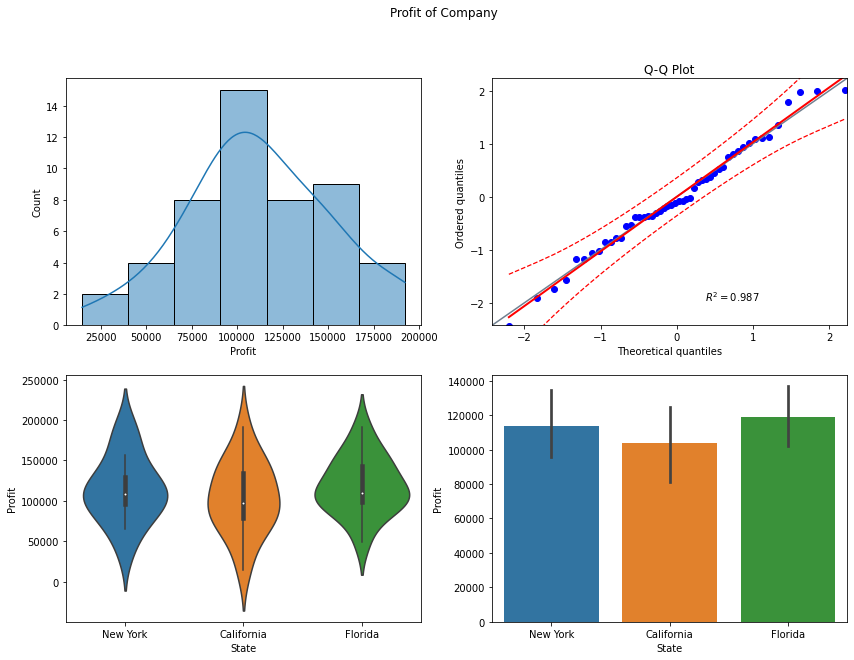

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(x=df["Profit"], ax=axes[0][0], kde=True)
qqplot(df["Profit"], dist="norm", ax=axes[0][1])
sns.violinplot(x=df.State, y=df["Profit"], ax=axes[1][0])
sns.barplot(x=df.State, y=df["Profit"], ax=axes[1][1])
plt.suptitle("Profit of Company")
plt.show()

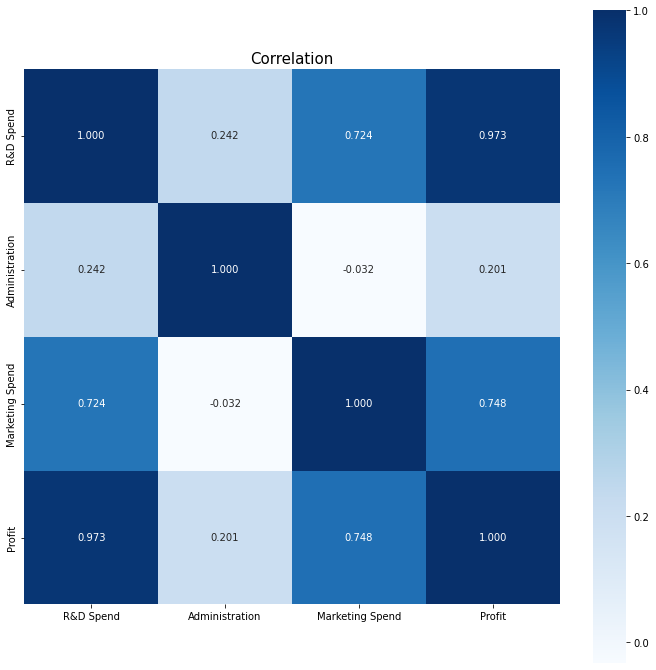

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".3f", square=True, cmap="Blues")
plt.title("Correlation", size=15)
plt.show()

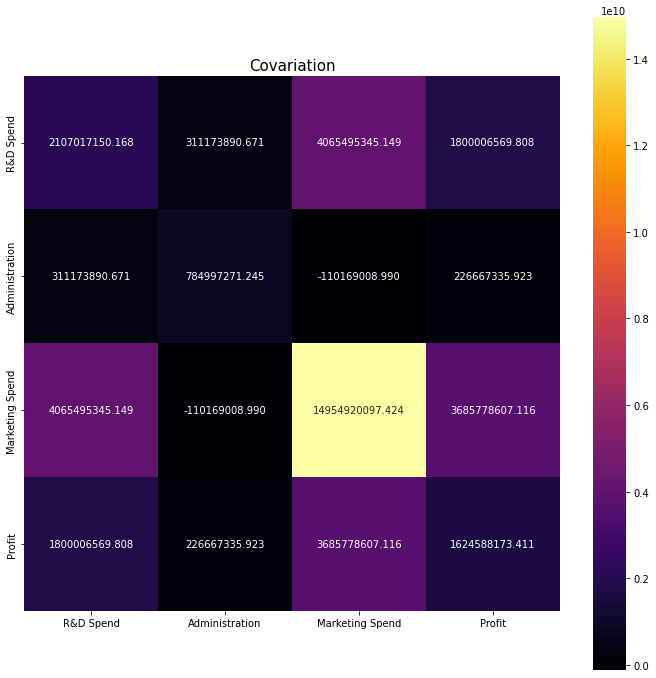

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.cov(), annot=True, fmt=".3f", square=True, cmap="inferno")
plt.title("Covariation", size=15)
plt.show()

### Data Preprocessing

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from yellowbrick.target import BalancedBinningReference
from yellowbrick.regressor import ResidualsPlot, prediction_error

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
# encode the categorical values
label_encoder = LabelEncoder()
df.State = label_encoder.fit_transform(df.State)
df.State.unique()

array([2, 0, 1])

In [26]:
label_encoder.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [27]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [28]:
X = df.drop(["Profit"], axis=1)
y = df["Profit"]

In [29]:
X[:5]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [30]:
y[:5]

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

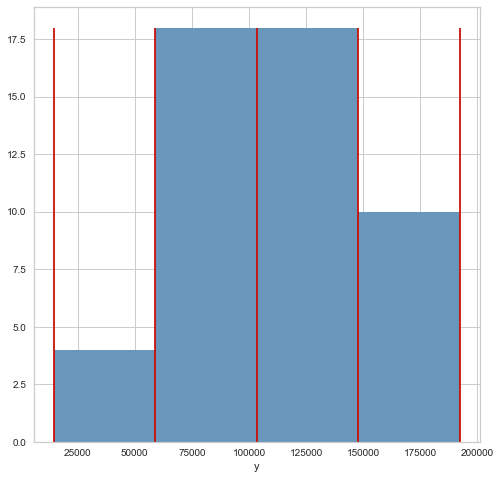

In [31]:
plt.figure(figsize=(8, 8))
visualizer = BalancedBinningReference()
visualizer.fit(y)
visualizer.show()
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.metrics import (
    mean_squared_log_error,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)
from sklearn.model_selection import cross_val_score

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression(normalize=True, n_jobs=-1)
lr_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [35]:
lr_reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': True,
 'positive': False}

In [36]:
y_pred = lr_reg.predict(X_test)
y_pred[:5]

array([126720.66150723,  84909.08961913,  98890.31854876,  46479.31240248,
       129113.18318813])

In [37]:
lr_reg.coef_

array([  0.80379465,  -0.06791023,   0.03126059, -16.82030683])

In [38]:
lr_reg.intercept_

54080.716846120835

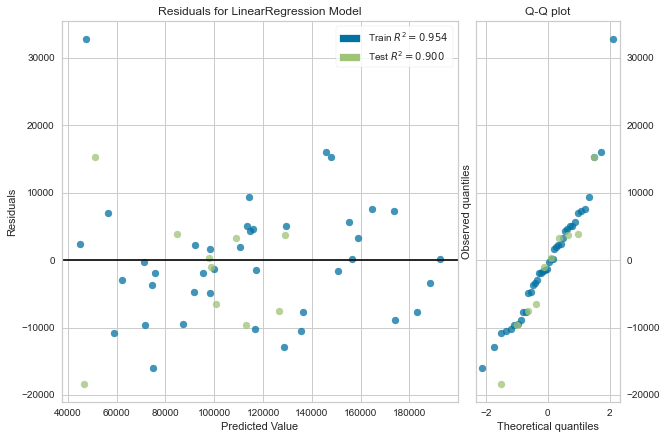

In [39]:
plt.figure(figsize=(10, 7))
visualizer = ResidualsPlot(lr_reg, qqplot=True, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

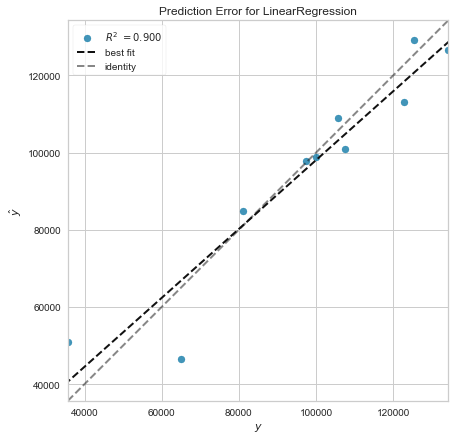

In [40]:
plt.figure(figsize=(10, 7))
visualizer = prediction_error(lr_reg, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

In [41]:
accuracies = cross_val_score(lr_reg, X_train, y_train)
accuracies.mean()

0.9322934777389238